<a href="https://colab.research.google.com/github/ghowtham12/task-7/blob/main/Decision_Trees_Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:

df = pd.read_csv('/content/Social_Network_Ads.csv')
df
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df['Gender'] = df.Gender.map({'Male':0,'Female':1})
df
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [5]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [7]:
x = df[['Gender','Age', 'EstimatedSalary']].values
y = df['Purchased'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.fit_transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
de = dt.fit(x_train,y_train)

**Predicting the Test set results**

In [11]:
y_pred = dt.predict(x_test)
y_pred
     

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[47, 11],
       [ 2, 20]])

Accuracy Score :  0.8375
F1 score :  0.7547169811320754


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


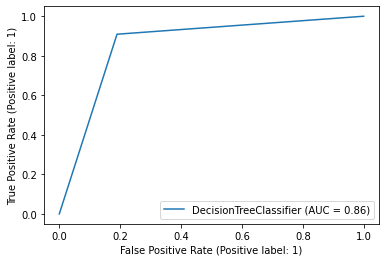

In [14]:
from sklearn.metrics import accuracy_score,f1_score,plot_roc_curve
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("F1 score : ", f1_score(y_test,y_pred))
dt.score(x_test,y_test)
plot_roc_curve(dt, x_test, y_test)

**Visualising the Training set results**

[Text(0.48295454545454547, 0.9583333333333334, 'X[1] <= 0.414\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.2215909090909091, 0.875, 'X[2] <= 0.58\ngini = 0.292\nsamples = 225\nvalue = [185, 40]'),
 Text(0.10227272727272728, 0.7916666666666666, 'X[1] <= -0.151\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.07954545454545454, 0.7083333333333334, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.125, 0.7083333333333334, 'X[2] <= 0.374\ngini = 0.225\nsamples = 62\nvalue = [54, 8]'),
 Text(0.10227272727272728, 0.625, 'X[2] <= -0.098\ngini = 0.18\nsamples = 60\nvalue = [54, 6]'),
 Text(0.07954545454545454, 0.5416666666666666, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.125, 0.5416666666666666, 'X[0] <= -0.031\ngini = 0.32\nsamples = 30\nvalue = [24, 6]'),
 Text(0.06818181818181818, 0.4583333333333333, 'X[2] <= -0.01\ngini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.045454545454545456, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.090

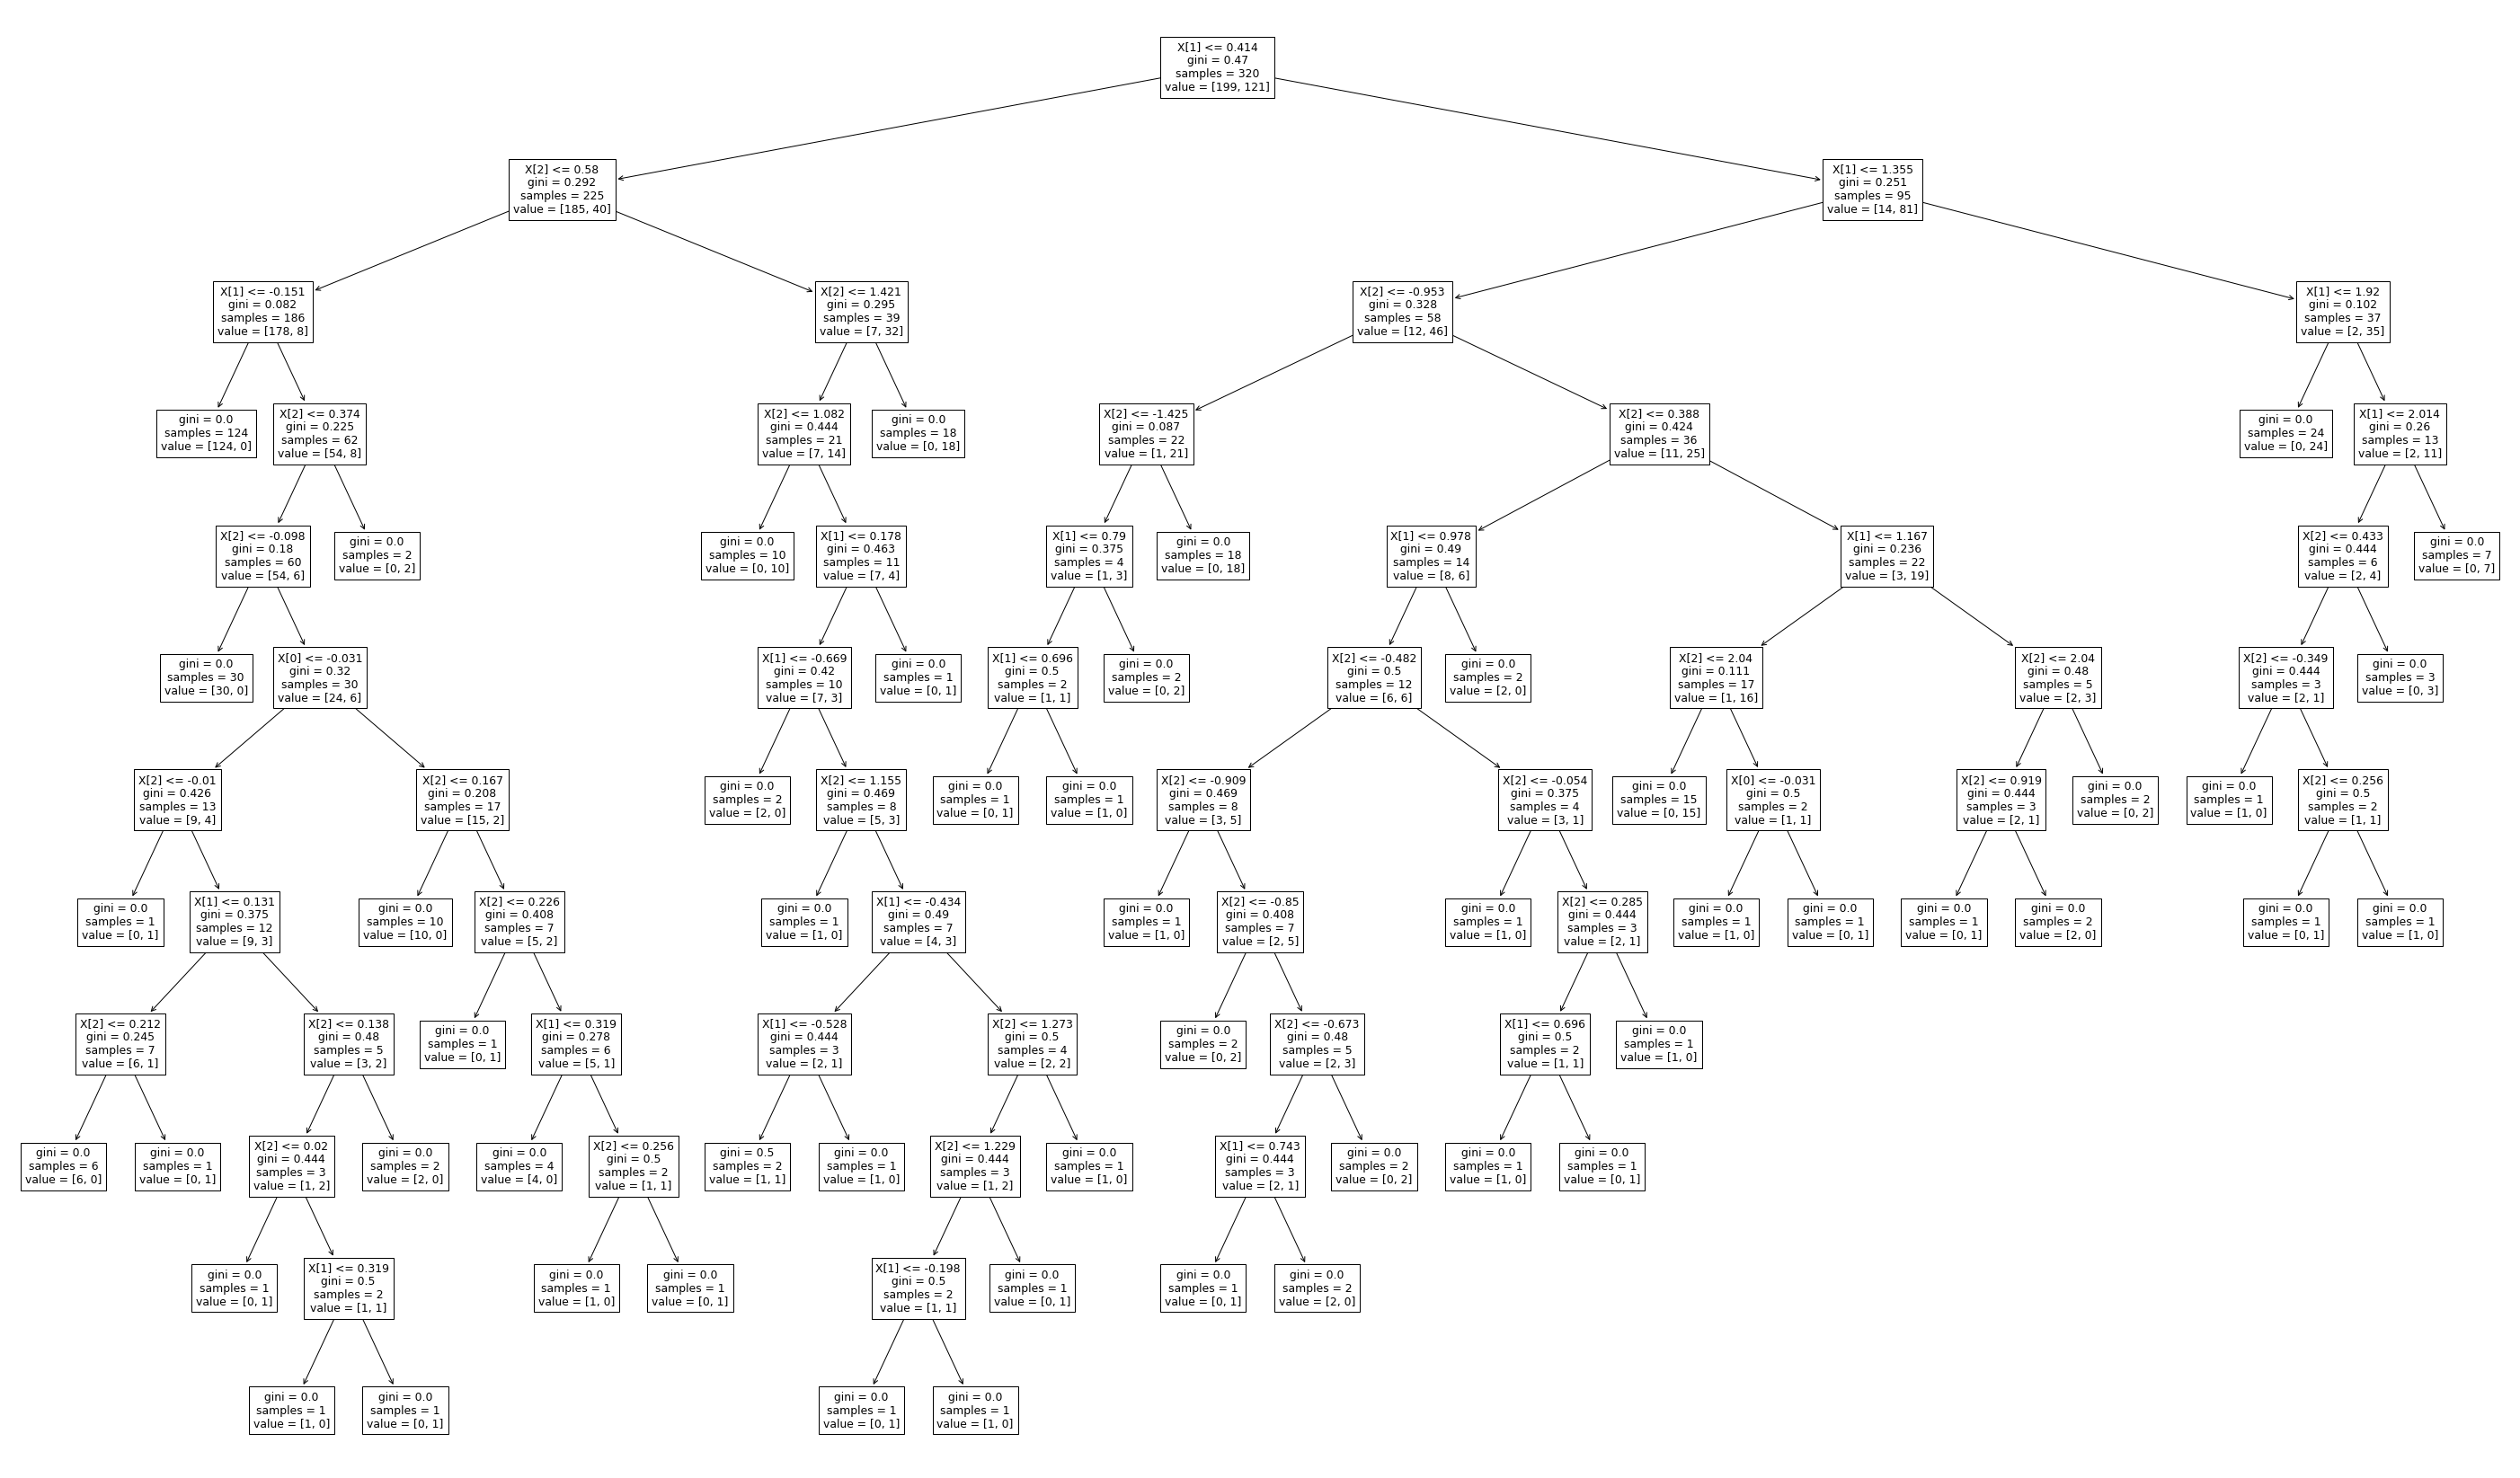

In [17]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(de)

**Visualising the Test set results**

[Text(0.48295454545454547, 0.9583333333333334, "['1.0253204627247288' '1.8853390995446704' '-1.1486514345703482'] <= 0.414\ngini = 0.47\nsamples = 320\nvalue = [199, 121]\nclass = 0"),
 Text(0.2215909090909091, 0.875, "['1.0253204627247288' '-0.9192975774639304' '-1.0028834860208116'] <= 0.58\ngini = 0.292\nsamples = 225\nvalue = [185, 40]\nclass = 0"),
 Text(0.10227272727272728, 0.7916666666666666, "['1.0253204627247288' '1.8853390995446704' '-1.1486514345703482'] <= -0.151\ngini = 0.082\nsamples = 186\nvalue = [178, 8]\nclass = 0"),
 Text(0.07954545454545454, 0.7083333333333334, 'gini = 0.0\nsamples = 124\nvalue = [124, 0]\nclass = 0'),
 Text(0.125, 0.7083333333333334, "['1.0253204627247288' '-0.9192975774639304' '-1.0028834860208116'] <= 0.374\ngini = 0.225\nsamples = 62\nvalue = [54, 8]\nclass = 0"),
 Text(0.10227272727272728, 0.625, "['1.0253204627247288' '-0.9192975774639304' '-1.0028834860208116'] <= -0.098\ngini = 0.18\nsamples = 60\nvalue = [54, 6]\nclass = 0"),
 Text(0.079545

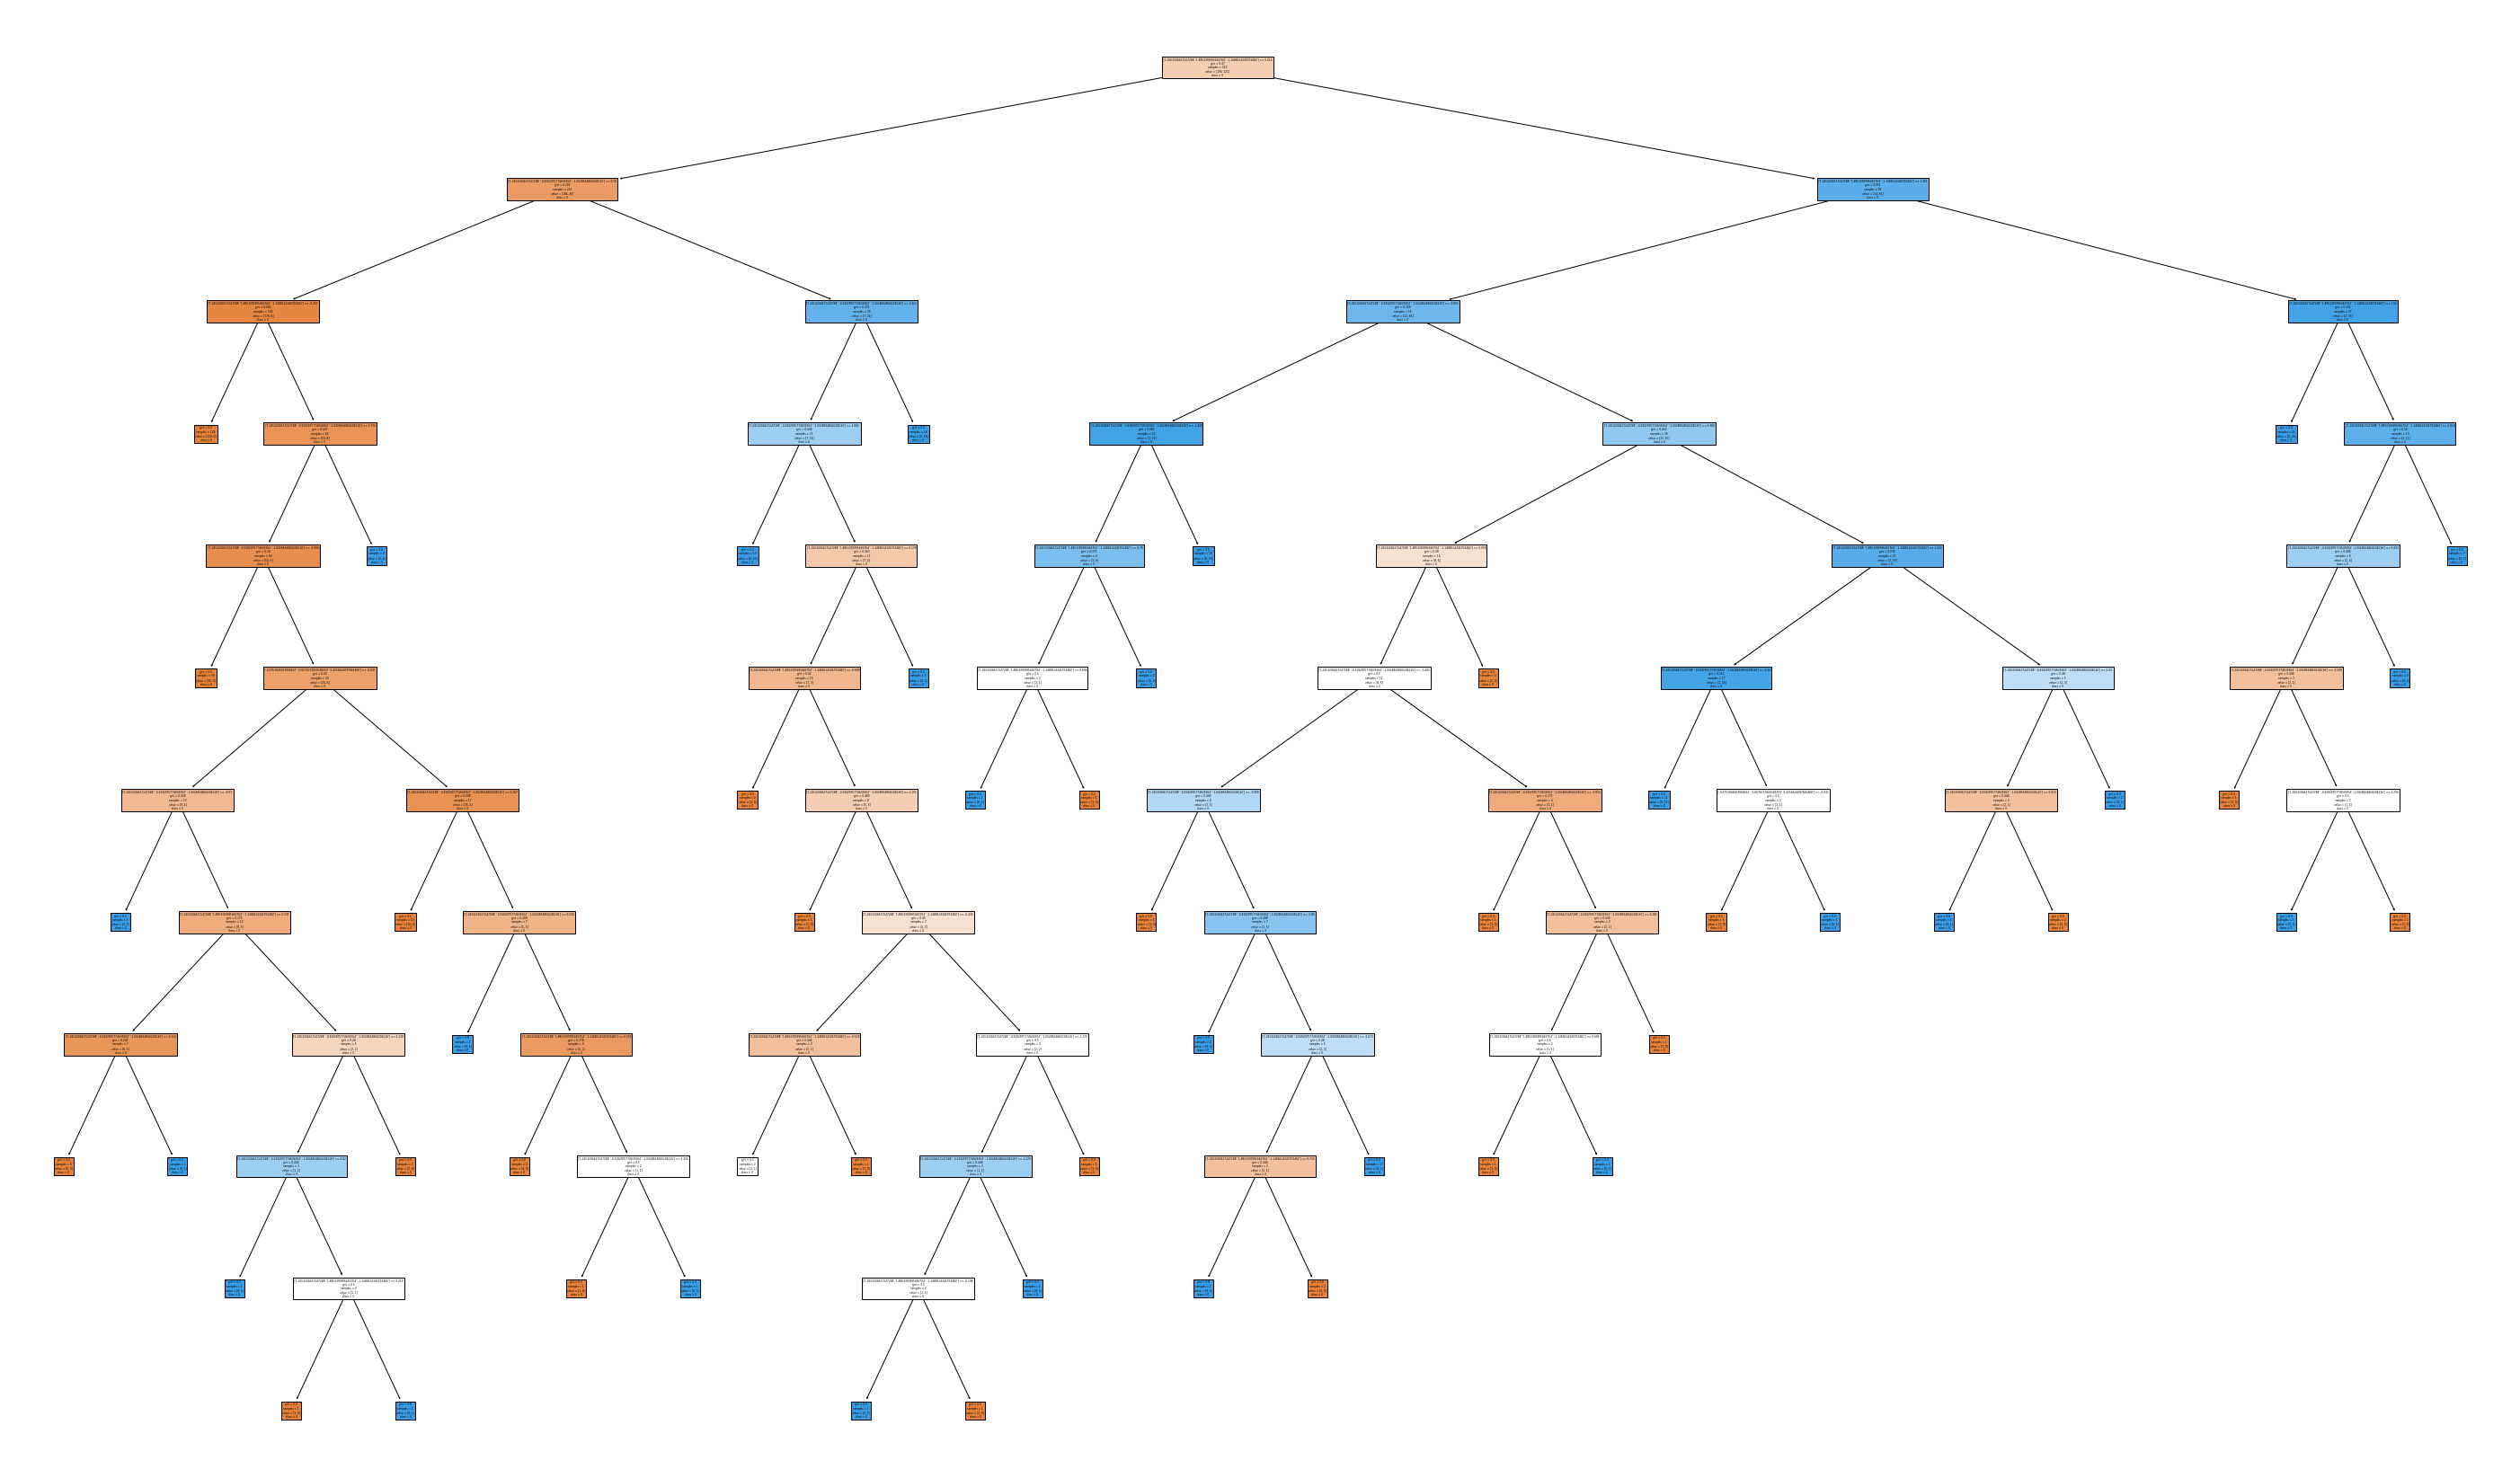

In [23]:
plt.figure(figsize=(50,30))
target_names=np.array(y)
feature_names_test=np.array(x_test)
target_names=target_names.astype('str')
feature_names_test=feature_names_test.astype('str')
tree.plot_tree(dt, feature_names=feature_names_test,class_names=target_names,filled=True)